#Analysis of the Top 50 ATP Tennis Players

In this workbook, I will be analyzing the statistics webscraped from tennisabstract.com in order to compare the metrics of professional play with tennis methodology I have learned throughout my own tennis career (Playing and Coaching). 

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import io

We will now load data from our webscraped csv into a dataframe

In [49]:
serve_datapath = requests.get("https://raw.githubusercontent.com/Kennan-Guan/tennis_analysis/main/serve.csv").content

serve_data = pd.read_csv(io.StringIO(serve_datapath.decode('utf-8')))

Now print the dataframe and perform data checks

In [50]:
serve_data.head(5)


,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG
0,1,Daniil Medvedev [RUS],65,50-15,76.9%,67.7%,67.5%,507,11.4%,230,5.2%,14.1%,63.4%,76.7%,52.3%,60.9%,86.4%,6.2,2.0
1,2,Alexander Zverev [GER],57,44-13,77.2%,68.6%,67.6%,416,12.1%,149,4.3%,14.8%,70.7%,76.3%,49.9%,58.5%,86.8%,6.0,1.9
2,3,Rafael Nadal [ESP],39,35-4,89.7%,66.7%,67.8%,159,5.6%,120,4.3%,12.3%,65.5%,72.9%,55.1%,62.8%,84.5%,6.2,2.1
3,4,Carlos Alcaraz [ESP],66,54-12,81.8%,66.7%,67.2%,237,5.1%,151,3.2%,9.2%,64.7%,72.4%,56.1%,61.8%,84.8%,6.3,2.1
4,5,Stefanos Tsitsipas [GRE],70,50-20,71.4%,67.7%,66.2%,506,9.9%,144,2.8%,7.3%,61.5%,75.7%,54.8%,59.1%,85.5%,6.2,2.0


In [51]:
serve_data.dtypes

Rk           int64
Player      object
M            int64
M W-L       object
M W%        object
SPW         object
SPW-InP     object
Aces         int64
Ace%        object
DFs          int64
DF%         object
DF/2s       object
1stIn       object
1st%        object
2nd%        object
2%-InP      object
Hld%        object
Pts/SG     float64
PtsL/SG    float64
dtype: object

We see above that many of the columns that contain numbers are listed as objects. We need to convert these objects into appropraite float values, and then changing the values from percent to decimal.

In [52]:
for col in serve_data:
    if col not in ('Rk', 'Player', 'M', 'M W-L', 'Aces', 'DFs', 'Pts/SG', 'PtsL/SG'):
        serve_data[col] = serve_data[col].astype(str)
        serve_data[col] = serve_data[col].str.rstrip('%').astype('float')/100.0
serve_data.dtypes


Rk           int64
Player      object
M            int64
M W-L       object
M W%       float64
SPW        float64
SPW-InP    float64
Aces         int64
Ace%       float64
DFs          int64
DF%        float64
DF/2s      float64
1stIn      float64
1st%       float64
2nd%       float64
2%-InP     float64
Hld%       float64
Pts/SG     float64
PtsL/SG    float64
dtype: object

We now check to see if the values are now correct

In [53]:
serve_data.head(5)

,Rk,Player,M,M W-L,M W%,SPW,SPW-InP,Aces,Ace%,DFs,DF%,DF/2s,1stIn,1st%,2nd%,2%-InP,Hld%,Pts/SG,PtsL/SG
0,1,Daniil Medvedev [RUS],65,50-15,0.769,0.677,0.675,507,0.114,230,0.052,0.141,0.634,0.767,0.523,0.609,0.864,6.2,2.0
1,2,Alexander Zverev [GER],57,44-13,0.772,0.686,0.676,416,0.121,149,0.043,0.148,0.707,0.763,0.499,0.585,0.868,6.0,1.9
2,3,Rafael Nadal [ESP],39,35-4,0.897,0.667,0.678,159,0.056,120,0.043,0.123,0.655,0.729,0.551,0.628,0.845,6.2,2.1
3,4,Carlos Alcaraz [ESP],66,54-12,0.818,0.667,0.672,237,0.051,151,0.032,0.092,0.647,0.724,0.561,0.618,0.848,6.3,2.1
4,5,Stefanos Tsitsipas [GRE],70,50-20,0.714,0.677,0.662,506,0.099,144,0.028,0.073,0.615,0.757,0.548,0.591,0.855,6.2,2.0


Using data web scraped from tennisabstract.com, we will look at what attributes and trends define top rated professional tennis players. We will also look at what seperates the best of the best (top 10, Big 3, etc.) from other top rated players and the impact of these traits on their playstyles. 

I will first break down the imported dataset into categories, so we can compare these groups with all 50 players

In [54]:
top_10 = serve_data[serve_data['Rk'] <= 10]
djokovic = serve_data[serve_data.Player == 'Novak Djokovic [SRB]']
isner = serve_data[serve_data.Player == 'John Isner [USA]']


First, let's look at the serve. The serve is what starts each point and therefore gives the server an advantage because they get to choose how to start the point. Naturally, we could argue that a strong serve will yield better results. Let's first look at aces (an unreturnable serve) and hold percentage (games won as the server).

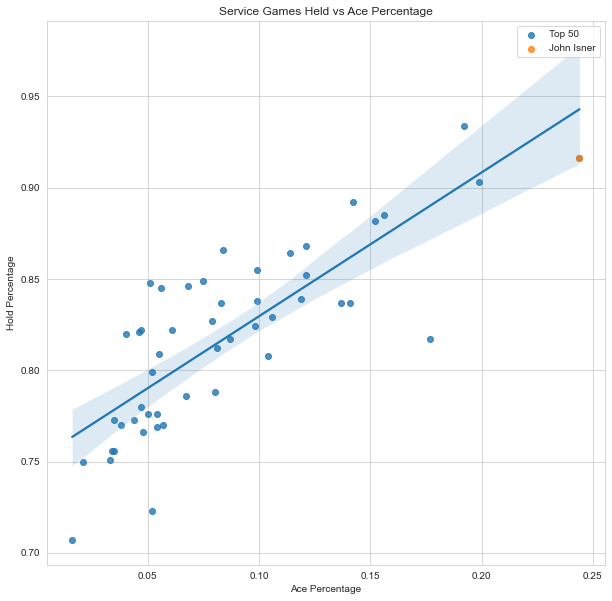

In [55]:
plt.figure(figsize=(10,10))
sns.regplot(data=serve_data, x='Ace%', y='Hld%', label='Top 50')
sns.regplot(data=isner,x='Ace%', y='Hld%',label='John Isner')
plt.xlabel('Ace Percentage')
plt.ylabel('Hold Percentage')
plt.title('Service Games Held vs Ace Percentage')
sns.set_style('whitegrid')
plt.legend()

Here, I used a simple regression which reveals there is indeed a positive relationship between hold percentange and ace percentage. This makes sense because aces will give you points and in turn lead to more games won. I also added an orange dot for John Isner, an american tennis player known for his serve. His height of 6'10'' along with his incredible serve speeds lead him to have among the highest ace and hold percentages. His all-time highest ranking was 8, but has not won a grand slam.

Now let us compare ace percentage and matches won.

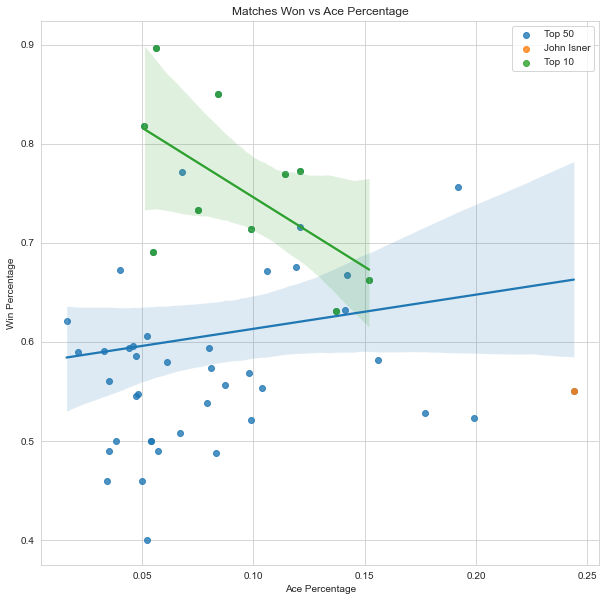

In [56]:
plt.figure(figsize=(10,10))
sns.regplot(data=serve_data, x='Ace%', y='M W%', label='Top 50')
sns.regplot(data=isner,x='Ace%', y='M W%', label='John Isner')
sns.regplot(data=top_10,x='Ace%', y='M W%', label='Top 10')
plt.xlabel('Ace Percentage')
plt.ylabel('Win Percentage')
plt.title('Matches Won vs Ace Percentage')
sns.set_style('whitegrid')
plt.legend()

We can see that there is barely a relationship between ace percentage and win percentage. I broke down the data into players in the top 50 and players in the top 10. I also highlighted John Isner's ace percentage in orange. We see he holds the highest ace percentage in the top 50 but does not have the highest win percentage. The highest win percentage is held by those in the top 10, yet their ace percentage is below 15%, along with the majority of top 50 players. So, high aces do not mean more wins, but rather more games held. This makes sense with what we see in player results at tournaments. Players with strong serves tend to hold frequently, but do not have any strong backup plans if their opponent manages to return their serves. Aces are useful, but will not guarentee wins. 